In [1]:
import project_functions3 as p3
df=p3.load_and_process('../data/raw/fundamentals.csv')
df

,Ticker Symbol,Cost of Revenue,Earnings Before Interest and Tax,Earnings Before Tax,Gross Profit,Income Tax,"Sales, General and Admin.",Total Current Liabilities,Total Revenue,For Year
0,AAL,1.049900e+10,-1.813000e+09,-2.445000e+09,1.435600e+10,-569000000.0,1.297700e+10,9.011000e+09,2.485500e+10,2012.0
20,ABT,8.899000e+09,1.000000e+08,-2.200000e+08,1.015100e+10,-457000000.0,6.735000e+09,1.328000e+10,1.905000e+10,2012.0
36,ADS,2.392091e+09,9.743640e+08,6.829040e+08,1.249299e+09,260648000.0,1.080590e+08,5.032777e+09,3.641390e+09,2012.0
44,AEE,3.477000e+09,1.221000e+09,8.290000e+08,2.304000e+09,307000000.0,4.430000e+08,2.686000e+09,5.781000e+09,2012.0
48,AEP,6.395000e+09,2.810000e+09,1.822000e+09,8.550000e+09,604000000.0,3.812000e+09,6.823000e+09,1.494500e+10,2012.0
...,...,...,...,...,...,...,...,...,...,...
1760,XYL,2.249000e+09,4.580000e+08,4.030000e+08,1.404000e+09,63000000.0,8.540000e+08,8.230000e+08,3.653000e+09,2015.0
1764,YHOO,2.077748e+09,-4.813176e+09,-4.813176e+09,2.890553e+09,-89598000.0,1.768522e+09,1.277380e+09,4.968301e+09,2015.0
1772,ZBH,1.800600e+09,4.398000e+08,1.532000e+08,4.197200e+09,7000000.0,2.291900e+09,1.617900e+09,5.997800e+09,2015.0
1776,ZION,4.934400e+07,5.207260e+08,4.518590e+08,0.000000e+00,142388000.0,1.591239e+09,0.000000e+00,2.210591e+09,2015.0


In [2]:
def preprocessYearByYearData(df):
    #For now we are looking only for studied variable, 'Total Revenue'
    relevant_features_in_list=df.columns.tolist()
    tonotstury=relevant_features_in_list.copy()
    tonotstury.remove('Cost of Revenue')
    tonotstury.remove('For Year')
    tonotstury.remove('Total Revenue')
    df2 = df.copy().drop(tonotstury, axis=1)
    
    #we'll take away outliers
    costs = np.array(df2['Cost of Revenue'])
    costs_low, costs_hgh = np.percentile(costs, [5, 95])
    print(costs_low, costs_hgh)
    df_cleaned = df2[df2['Cost of Revenue'].between(costs_low, costs_hgh)]
    revenus = np.array(df2['Total Revenue'])
    revenus_low, revenus_hgh = np.percentile(revenus, [5, 95])
    print(revenus_low, revenus_hgh)
    df_cleaned = df_cleaned[df_cleaned['Total Revenue'].between(revenus_low, revenus_hgh)]
    
    df_cleaned['Ratio'] = df_cleaned['Cost of Revenue'] / df_cleaned['Total Revenue']
    df_cleaned['Difference'] =  df_cleaned['Total Revenue']-df_cleaned['Cost of Revenue']
    #we'll take away outliers for these values as well
    ratios = np.array(df_cleaned['Ratio'])
    ratios_low, ratios_hgh = np.percentile(ratios, [5, 95])   
    df_cleaned = df_cleaned[df_cleaned['Ratio'].between(ratios_low, ratios_hgh)]
    differences = np.array(df_cleaned['Difference'])
    differences_low, differences_hgh = np.percentile(differences, [5, 95])   
    df_cleaned = df_cleaned[df_cleaned['Difference'].between(differences_low, differences_hgh)]
    
    
    df2_2012 = df_cleaned.copy()[df_cleaned['For Year']==2012]
    df2_2013 = df_cleaned.copy()[df_cleaned['For Year']==2013]
    df2_2014 = df_cleaned.copy()[df_cleaned['For Year']==2014]
    df2_2015 = df_cleaned.copy()[df_cleaned['For Year']==2015]        
    return df2_2012,df2_2013,df2_2014,df2_2015,df_cleaned

In [4]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from datetime import datetime

df_2012,df_2013,df_2014,df_2015,df2=preprocessYearByYearData(df)
print(df_2012.describe())
print(df_2013.describe())
print(df_2014.describe())
print(df_2015.describe())
print(df2.describe())

0.0 46324950000.00001
1375658050.0 87154450000.00006
       Cost of Revenue  Total Revenue  For Year       Ratio    Difference
count     1.490000e+02   1.490000e+02     149.0  149.000000  1.490000e+02
mean      4.442917e+09   9.115683e+09    2012.0    0.445202  4.672767e+09
std       4.648856e+09   7.298739e+09       0.0    0.231852  3.924654e+09
min       0.000000e+00   1.527042e+09    2012.0    0.000000  1.041600e+09
25%       1.125200e+09   3.823713e+09    2012.0    0.264754  1.726842e+09
50%       3.011684e+09   6.376000e+09    2012.0    0.488088  3.097418e+09
75%       6.530000e+09   1.224500e+10    2012.0    0.628054  6.565000e+09
max       2.193900e+10   3.715200e+10    2012.0    0.838592  1.933200e+10
       Cost of Revenue  Total Revenue  For Year       Ratio    Difference
count     2.320000e+02   2.320000e+02     232.0  232.000000  2.320000e+02
mean      5.454721e+09   1.048602e+10    2013.0    0.445256  5.031298e+09
std       6.754835e+09   9.477303e+09       0.0    0.244492

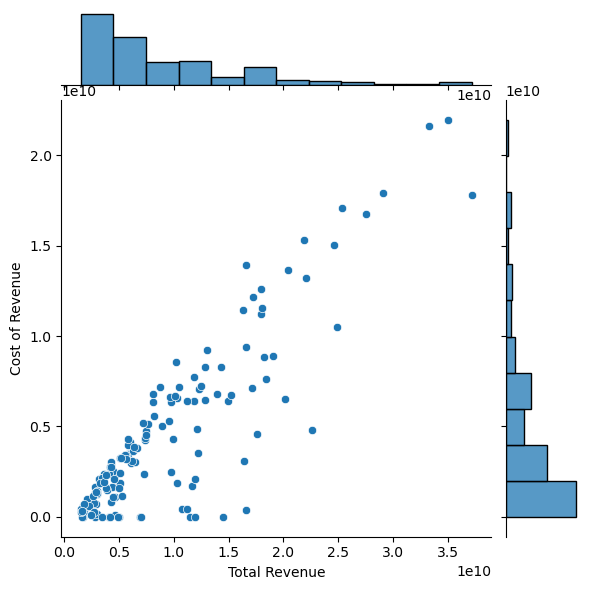

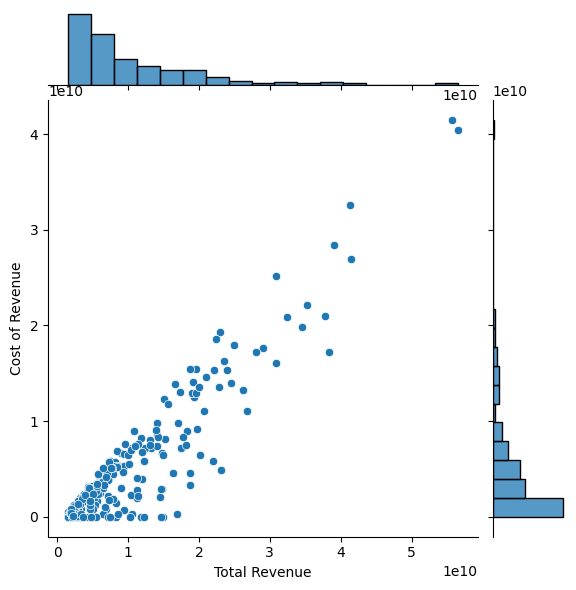

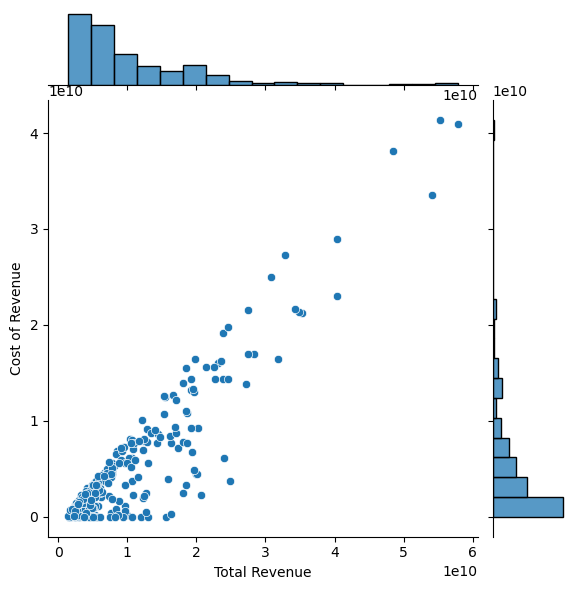

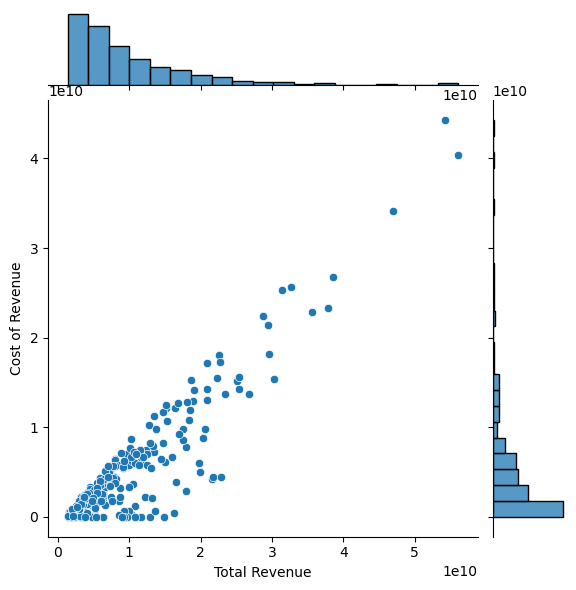

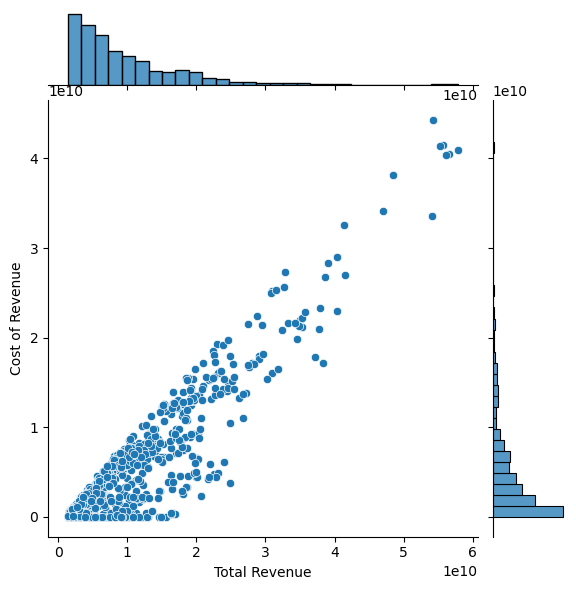

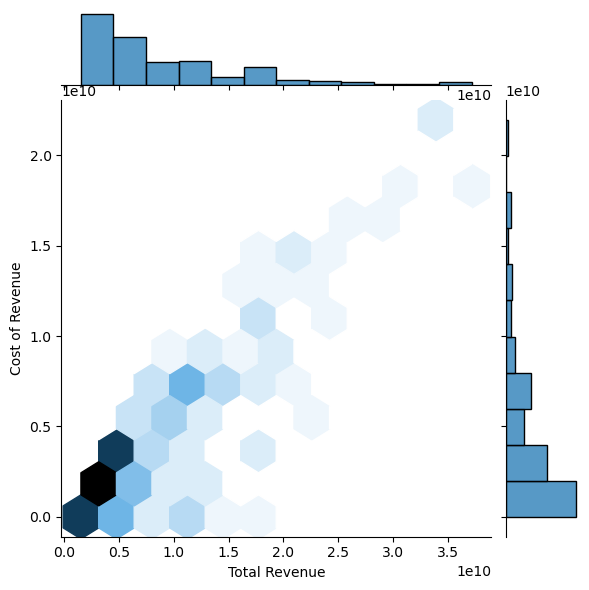

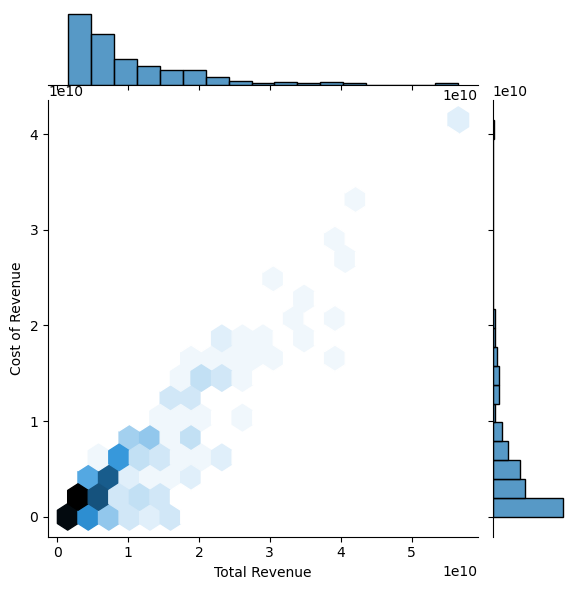

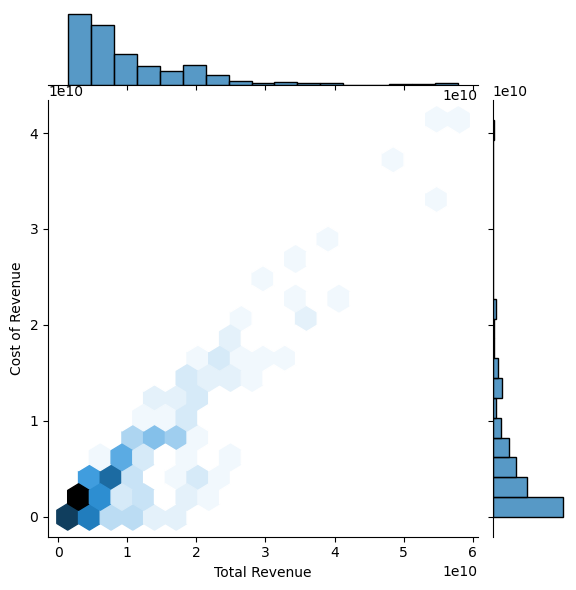

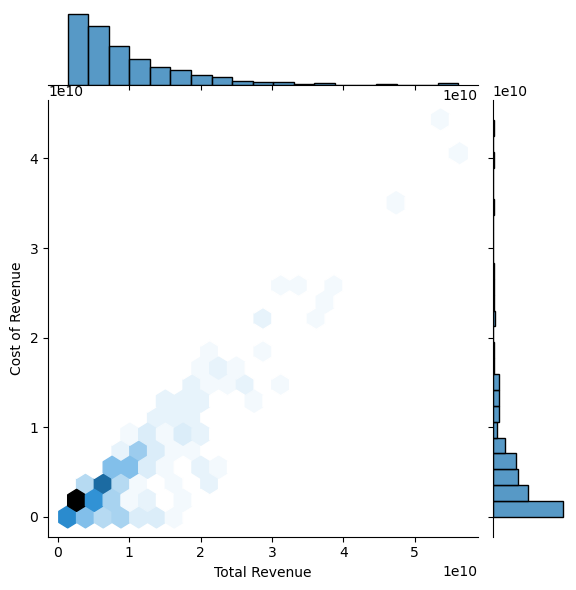

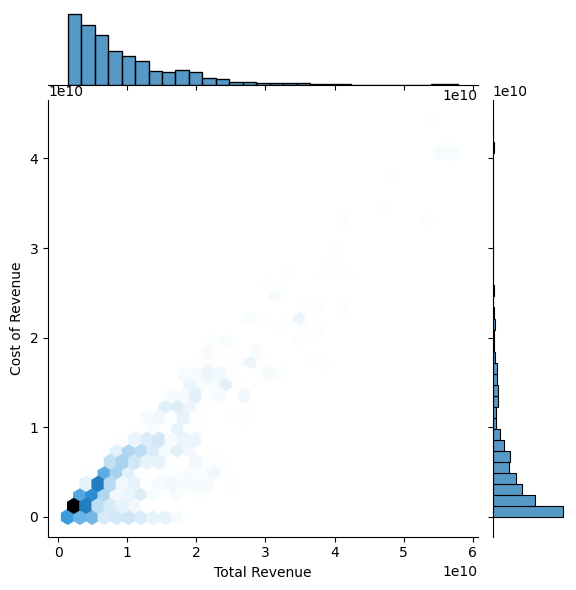

In [5]:
sns.jointplot(x='Total Revenue',y='Cost of Revenue', data=df_2012)
sns.jointplot(x='Total Revenue',y='Cost of Revenue', data=df_2013)
sns.jointplot(x='Total Revenue',y='Cost of Revenue', data=df_2014)
sns.jointplot(x='Total Revenue',y='Cost of Revenue', data=df_2015)
sns.jointplot(x='Total Revenue',y='Cost of Revenue', data=df2)

sns.jointplot(x='Total Revenue',y='Cost of Revenue', data=df_2012,kind='hex')
sns.jointplot(x='Total Revenue',y='Cost of Revenue', data=df_2013,kind='hex')
sns.jointplot(x='Total Revenue',y='Cost of Revenue', data=df_2014,kind='hex')
sns.jointplot(x='Total Revenue',y='Cost of Revenue', data=df_2015,kind='hex')
sns.jointplot(x='Total Revenue',y='Cost of Revenue', data=df2,kind='hex')

In [6]:
from sklearn.linear_model import LinearRegression

def MyLinearRegression(df):
    x=df[['Total Revenue']] # independent variable
    y=df['Cost of Revenue'] # dependent variable

    x = sm.add_constant(x) # adding a constant
    lm = sm.OLS(y,x).fit() # fitting the model
    print(lm.summary())
    
def MyPredictionGraph(df,coef,const):
    x=df[['Total Revenue']] # independent variable
    y=df['Cost of Revenue'] # dependent variable
    y_pred = coef * x['Total Revenue']+const
    # plotting the data points
    sns.scatterplot(x=x['Total Revenue'], y=y)
    #plotting the line
    sns.lineplot(x=x['Total Revenue'],y=y_pred, color='red')
    #axes
    plt.xlim(0)
    plt.ylim(0)
    plt.show()

In [7]:
MyLinearRegression(df2)
MyLinearRegression(df_2012)
MyLinearRegression(df_2013)
MyLinearRegression(df_2014)
MyLinearRegression(df_2015)

                            OLS Regression Results                            
Dep. Variable:        Cost of Revenue   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     4335.
Date:                Mon, 07 Nov 2022   Prob (F-statistic):               0.00
Time:                        11:41:51   Log-Likelihood:                -19834.
No. Observations:                 858   AIC:                         3.967e+04
Df Residuals:                     856   BIC:                         3.968e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.445e+09   1.37e+08    -10.572

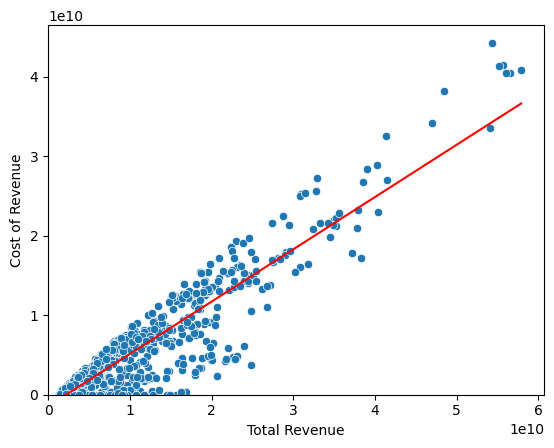

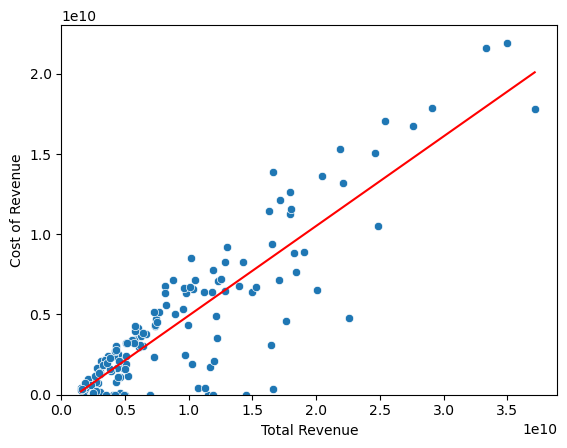

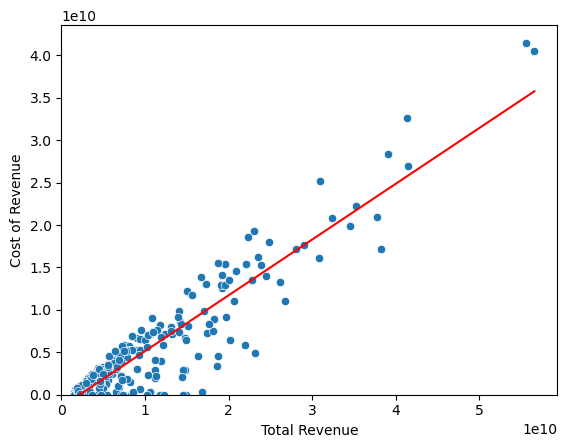

In [8]:
MyPredictionGraph(df2,0.6578,-1.445e+09)
MyPredictionGraph(df_2012,0.5583,-6.462e+08 )
MyPredictionGraph(df_2013,0.6570,-1.434e+09 )

In [9]:
#From linear regression, we see that 2012 year differs a lot, but not another ones. Let's consider them

df3=pd.concat([df_2013, df_2014,df_2015], axis=0)

In [10]:
#we use the general values of prediction here
df3['Predicted'] =  df3['Total Revenue']*0.6578-1.445e+09

In [11]:
df3.head()

,Cost of Revenue,Total Revenue,For Year,Ratio,Difference,Predicted
1,1.101900e+10,2.674300e+10,2013.0,0.412033,1.572400e+10,1.614655e+10
13,4.581000e+09,1.879000e+10,2013.0,0.243800,1.420900e+10,1.091506e+10
21,9.193000e+09,1.965700e+10,2013.0,0.467671,1.046400e+10,1.148537e+10
37,2.894917e+09,4.319063e+09,2013.0,0.670265,1.424146e+09,1.396080e+09
45,3.490000e+09,5.838000e+09,2013.0,0.597807,2.348000e+09,2.395236e+09


In [12]:
df3['DeltaWithPredicted'] =  df3['Cost of Revenue']-df3['Predicted']

In [13]:
print(df3.describe())

       Cost of Revenue  Total Revenue     For Year       Ratio    Difference  \
count     7.090000e+02   7.090000e+02   709.000000  709.000000  7.090000e+02   
mean      5.482581e+09   1.049784e+10  2014.007052    0.447292  5.015262e+09   
std       6.843465e+09   9.380957e+09     0.813867    0.247048  4.111853e+09   
min       0.000000e+00   1.381400e+09  2013.000000    0.000000  1.030128e+09   
25%       1.077420e+09   4.071300e+09  2013.000000    0.266312  1.964071e+09   
50%       3.199400e+09   7.348754e+09  2014.000000    0.499256  3.375000e+09   
75%       7.161200e+09   1.407784e+10  2015.000000    0.645709  6.683000e+09   
max       4.426900e+10   5.790000e+10  2015.000000    0.839342  2.110200e+10   

          Predicted  DeltaWithPredicted  
count  7.090000e+02        7.090000e+02  
mean   5.460481e+09        2.209987e+07  
std    6.170794e+09        2.708993e+09  
min   -5.363151e+08       -1.113964e+10  
25%    1.233101e+09       -7.059979e+08  
50%    3.389010e+09        

In [14]:
df3=df3.copy().drop(['Ratio','Difference'], axis=1)

In [15]:
df3['RelativeDiff'] =  df3['DeltaWithPredicted']/df3['Cost of Revenue']

In [16]:
print(df3.describe())

       Cost of Revenue  Total Revenue     For Year     Predicted  \
count     7.090000e+02   7.090000e+02   709.000000  7.090000e+02   
mean      5.482581e+09   1.049784e+10  2014.007052  5.460481e+09   
std       6.843465e+09   9.380957e+09     0.813867  6.170794e+09   
min       0.000000e+00   1.381400e+09  2013.000000 -5.363151e+08   
25%       1.077420e+09   4.071300e+09  2013.000000  1.233101e+09   
50%       3.199400e+09   7.348754e+09  2014.000000  3.389010e+09   
75%       7.161200e+09   1.407784e+10  2015.000000  7.815405e+09   
max       4.426900e+10   5.790000e+10  2015.000000  3.664162e+10   

       DeltaWithPredicted  RelativeDiff  
count        7.090000e+02    709.000000  
mean         2.209987e+07           NaN  
std          2.708993e+09           NaN  
min         -1.113964e+10          -inf  
25%         -7.059979e+08     -0.259942  
50%          6.055689e+08      0.167173  
75%          1.342270e+09      0.391433  
max          1.000270e+10           inf  


In [17]:
df3.shape

(709, 6)

In [18]:
#we'll take away outliers for these values as well
df4 = df3[df3['RelativeDiff'].between(-100, 100)]

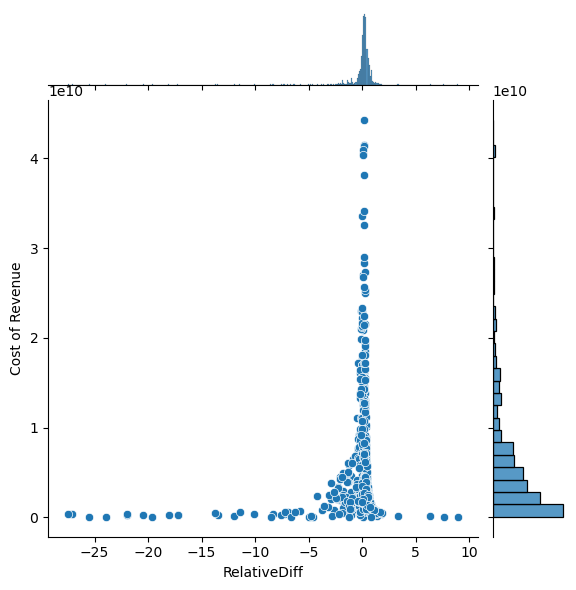

In [19]:
sns.jointplot(x='RelativeDiff',y='Cost of Revenue', data=df4)

In [20]:
df4.shape

(646, 6)

In [21]:
#we look where the mistake was less than 100 pourcents of the value
df5 = df3[df3['RelativeDiff'].between(-1, 1)]
df5.shape

(539, 6)

In [22]:
709-539

170

# Stock Price Analytics
Further, the stock prices of different stocks can be found to show patterns such as increased growth in Tech stocks and overall positive direction of stocks over the period 2010-2016 in terms of price with robust growth in 2016.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import project_functions1 as p1 

In [4]:
priceListDf = p1.load_and_process("../data/raw/prices-split-adjusted.csv")

Here is the data for 5 of the top tech companies in the US in terms of market valuation in 2010-2016.

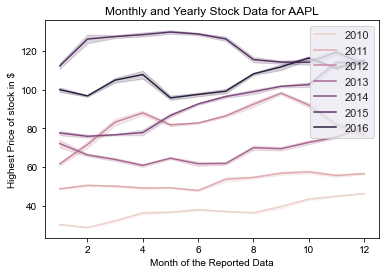

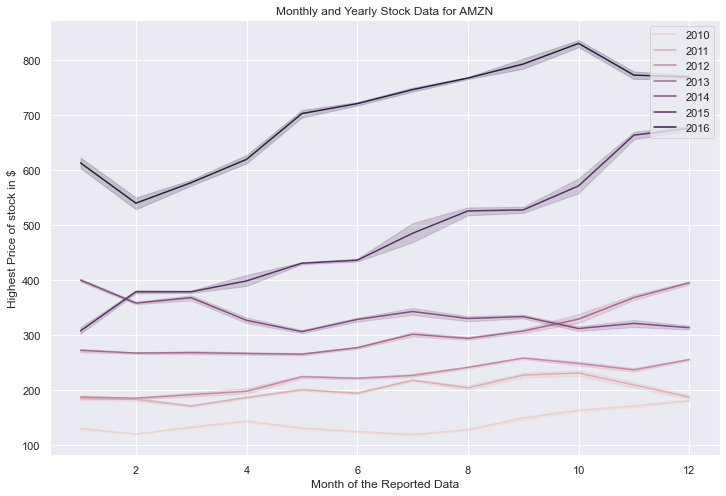

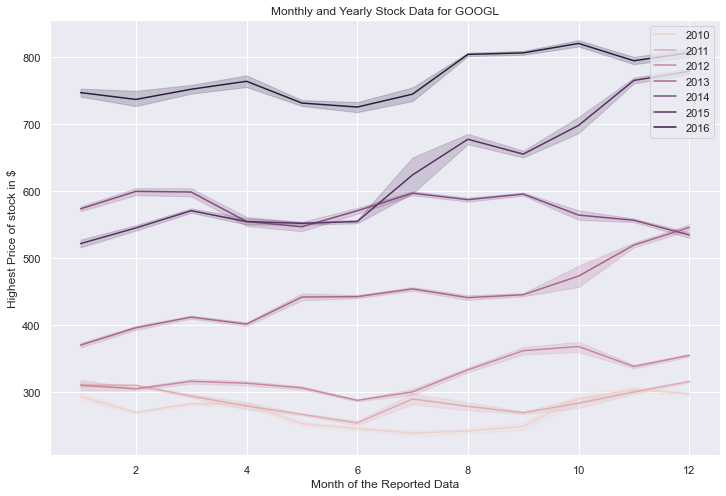

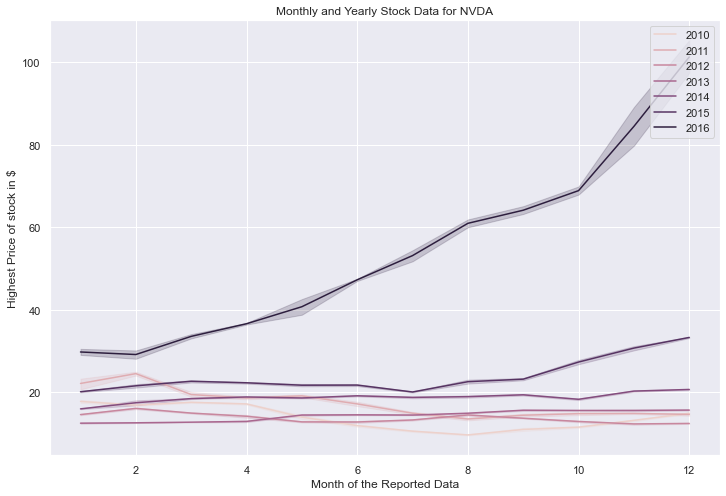

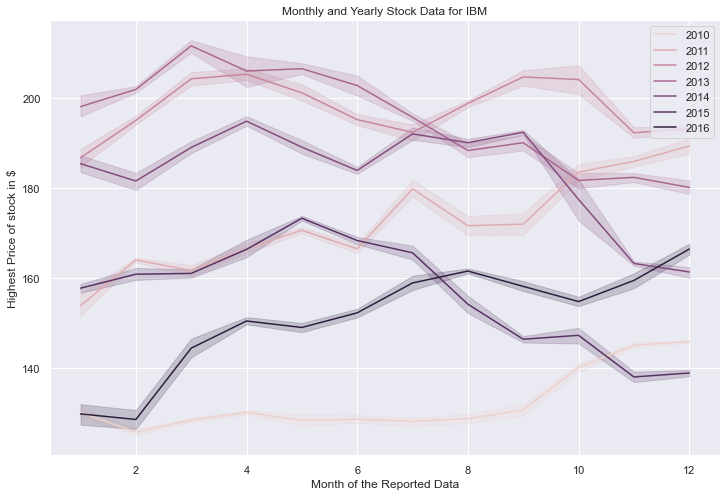

In [10]:
applePriceData=priceListDf[(priceListDf.symbol == 'AAPL')]
googlePriceData=priceListDf[(priceListDf.symbol == 'GOOGL')]
amazonPriceData=priceListDf[(priceListDf.symbol == 'AMZN')]
nvidiaPriceData=priceListDf[(priceListDf.symbol == 'NVDA')]
ibmPriceData=priceListDf[(priceListDf.symbol == 'IBM')]

apple=sns.lineplot(x = "reported_month", y = "high", data = applePriceData, hue = "reported_year")
apple.set_title(f'Monthly and Yearly Stock Data for AAPL')
apple.set_xlabel("Month of the Reported Data")
apple.set_ylabel("Highest Price of stock in $")
sns.set(rc = {'figure.figsize':(12,8)})
plt.legend(loc='upper right')
plt.show(apple)

amazon=sns.lineplot(x = "reported_month", y = "high", data = amazonPriceData, hue = "reported_year")
amazon.set_title(f'Monthly and Yearly Stock Data for AMZN')
amazon.set_xlabel("Month of the Reported Data")
amazon.set_ylabel("Highest Price of stock in $")
sns.set(rc = {'figure.figsize':(12,8)})
plt.legend(loc='upper right')
plt.show(amazon)

google=sns.lineplot(x = "reported_month", y = "high", data = googlePriceData, hue = "reported_year")
google.set_title(f'Monthly and Yearly Stock Data for GOOGL')
google.set_xlabel("Month of the Reported Data")
google.set_ylabel("Highest Price of stock in $")
sns.set(rc = {'figure.figsize':(12,8)})
plt.legend(loc='upper right')
plt.show(google)

nvidia=sns.lineplot(x = "reported_month", y = "high", data = nvidiaPriceData, hue = "reported_year")
nvidia.set_title(f'Monthly and Yearly Stock Data for NVDA')
nvidia.set_xlabel("Month of the Reported Data")
nvidia.set_ylabel("Highest Price of stock in $")
sns.set(rc = {'figure.figsize':(12,8)})
plt.legend(loc='upper right')
plt.show(nvidia)

ibm=sns.lineplot(x = "reported_month", y = "high", data = ibmPriceData, hue = "reported_year")
ibm.set_title(f'Monthly and Yearly Stock Data for IBM')
ibm.set_xlabel("Month of the Reported Data")
ibm.set_ylabel("Highest Price of stock in $")
sns.set(rc = {'figure.figsize':(12,8)})
plt.legend(loc='upper right')
plt.show(ibm)

# Stock Split Analytics 

Analysis of certain stock splits suggests that macro economical factors play a key role in dictating stock price. Despite favorable decisions from the executive of the companies, the price is very much tied to the wellbeing of the overall market.

In [2]:
import pandas as pd
import numpy as np
import plotly as go
import matplotlib.pylab as plt
import seaborn as sns 
import project_functions2 as p2

fundamentals_Df = pd.read_csv('../data/raw/fundamentals.csv')
pricesplit_Df = pd.read_csv('../data/raw/prices-split-adjusted.csv')
prices_Df = pd.read_csv('../data/raw/prices.csv')
securities_Df = pd.read_csv('../data/raw/securities.csv')

In [3]:
sorted_pricesplit=pricesplit_Df.sort_values(by = ["date"], ascending = True)
sorted_pricesplit.to_csv('sorted_pricesplit.csv', index =False)

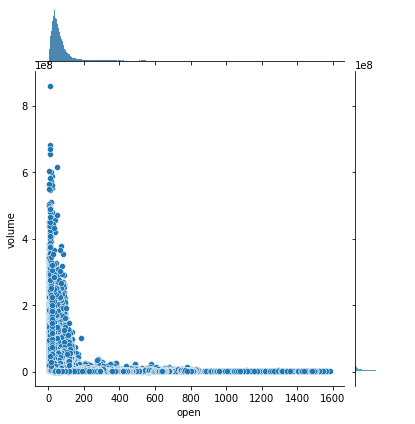

In [4]:
sns.jointplot(x='open',y='volume', data=sorted_pricesplit)

It can be noticed above that stocks at a higher price have a low trading volume while stocks at a lower price have the most trading volume which is expected considering the ability for retail investors to afford cheaper stocks with minimal risk.

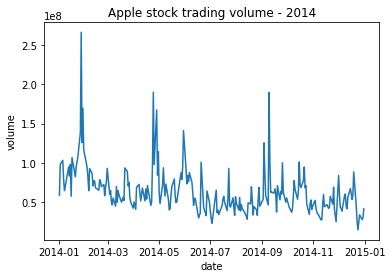

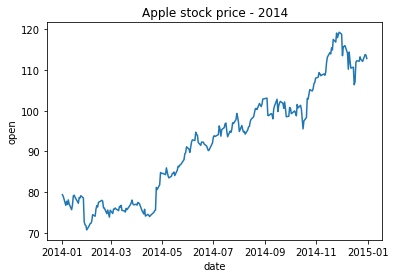

In [5]:
#interested_stocks= ["AAPL", "C"]
sorted_pricesplit['date'] = pd.to_datetime(sorted_pricesplit['date'], format='%Y-%m-%d')

#Apple 2014 stock split

filtered2014_df = sorted_pricesplit.loc[(sorted_pricesplit['date'] >= '2014-01-01')
                     & (sorted_pricesplit['date'] < '2015-01-01')]

apple_2014 = filtered2014_df.loc[filtered2014_df["symbol"]=="AAPL"]
plot1=sns.lineplot(x = "date", y = "volume", data =apple_2014)
plot1.set_title("Apple stock trading volume - 2014")
plt.show() #Shows volume variation based on the day

plot2=sns.lineplot(x = "date", y= "open", data= apple_2014);
plot2.set_title("Apple stock price - 2014")
plt.show() #Shows price variation based on the day

The above graphs illustrate that despite the expectation for a sharp rise in trading volume and a drop in share price, the share rpice continued to increase despite the stock split that took place on June 9th 2014. This shows that retail investors have less sway on the market as opposed to large financial investors who might have bought into the stock in large volumes which led to an overall increase in stock price despite the split.

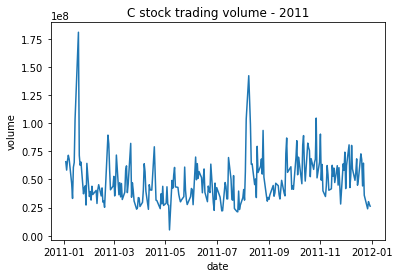

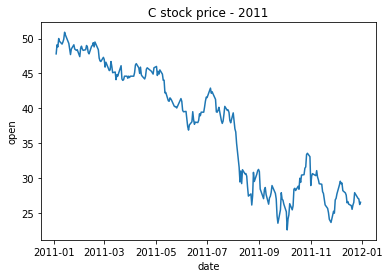

In [6]:
filtered2011_df = sorted_pricesplit.loc[(sorted_pricesplit['date'] >= '2011-01-01')
                     & (sorted_pricesplit['date'] < '2012-01-01')]

# Citygroup 2011 stock split

citygroup_2011 = filtered2011_df.loc[filtered2011_df["symbol"]=="C"]
plot1=sns.lineplot(x = "date", y = "volume", data =citygroup_2011)
plot1.set_title("C stock trading volume - 2011")
plt.show() #Shows volume variation based on the day

plot2=sns.lineplot(x = "date", y= "open", data= citygroup_2011);
plot2.set_title("C stock price - 2011")
plt.show() #Shows price variation based on the day

The above stock is an interesting stock to analyze as Citygroup went through a 1 for 10 reverse stock split in 2011 which was meant to increase the share price significantly. However, the financial crisis and the crash of the market later that year brough down the share price significantly despite the favorable split. 